<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/16_04_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np

In [111]:
df = pd.read_csv('dataset.csv', sep =',')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Quante sono le istanze contenute nel dataset?_____
Il dataset è completo (cioè per
ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non
esistono “missing values”)? _____
Il dataset è bilanciato per quanto riguarda la classe da
predire? ______ (punti 1)

In [112]:
print(f'Numero istanze: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero istanze: 4653
Numero colonne: 9


In [113]:
df.isnull().sum() #non ho valori nulli

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [114]:
df['LeaveOrNot'].value_counts() #il dataset non è bilanciato, il numero di impiegati che non abbandona il posto di lavoro è più alto di quelli che lo fanno

,count
LeaveOrNot,
0,3053
1,1600


Analizzare il dataset per determinare se allo stesso numero di anni di esperienza
corrisponde in media lo stesso livello di stipendio per uomini e donne. (punti 2)

In [115]:
df.pivot_table(index='Gender', columns='ExperienceInCurrentDomain', values='PaymentTier', aggfunc='mean')
#si può osservare che tendenzialmente i valori sono confrontabili, non c'è troppo scarto tra gli uni e gli altri
#tendenzialmente gli uomini hanno un livello di stimendio medio leggermente più alto ma ci sono eccezioni nel caso in cui
#il numero di anni di esperienza sia 6 e 7 in cui in questo caso si inverte il trend

ExperienceInCurrentDomain,0,1,2,3,4,5,6,7
Gender,,,,,,,,
Female,2.464789,2.537445,2.532438,2.548287,2.531335,2.564384,3.0,2.75
Male,2.812207,2.827795,2.773438,2.812903,2.826241,2.810469,2.5,2.60


Discretizzare Age in 3 gruppi e creare una tabella pivot che mostri la media di
abbandoni per gruppo di età e livello di educazione. Si può dire che c'è maggiore
probabilità di abbandono tra i giovani con un livello di educazione maggiore? (punti 3)

In [116]:
df['Age_disc'] = pd.cut(df['Age'], bins=3,labels=False) #con labels = false le lable dei gruppi sono int
df.pivot_table(index='Age_disc', columns='Education', values='LeaveOrNot', aggfunc='mean')

#la probabilità di abbandono maggiore si ha si per i più giovani però con livello di educazione "master" non PHD che corrisponderebbe al massimo
#la probabilità minore di abbandono si a invece per la fascia interedia di età con livello di educazione phd

Education,Bachelors,Masters,PHD
Age_disc,,,
0,0.312847,0.560377,0.235849
1,0.332436,0.377049,0.219512
2,0.295389,0.375000,0.343750


Considerando soltanto le donne, visualizzare in una heatmap la correlazione tra tutte
le feature nel dataset. Qual è la feature più correlata all’abbandono? Visualizzare in un
opportuno grafico il numero di abbandoni e non abbandoni per ogni valore di questa
feature. Quali considerazioni si possono fare? (punti 4)

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [120]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Age_disc
0,0,2017,0,3,34,1,0,0,0,1
1,0,2013,2,1,28,0,0,3,1,0
2,0,2014,1,3,38,0,0,2,0,2
3,1,2016,0,3,27,1,0,5,1,0
4,1,2017,2,3,24,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0,0
4649,1,2013,2,2,37,1,0,2,1,2
4650,1,2018,1,3,27,1,0,5,1,0
4651,0,2012,0,3,30,1,1,2,0,1


<Axes: >

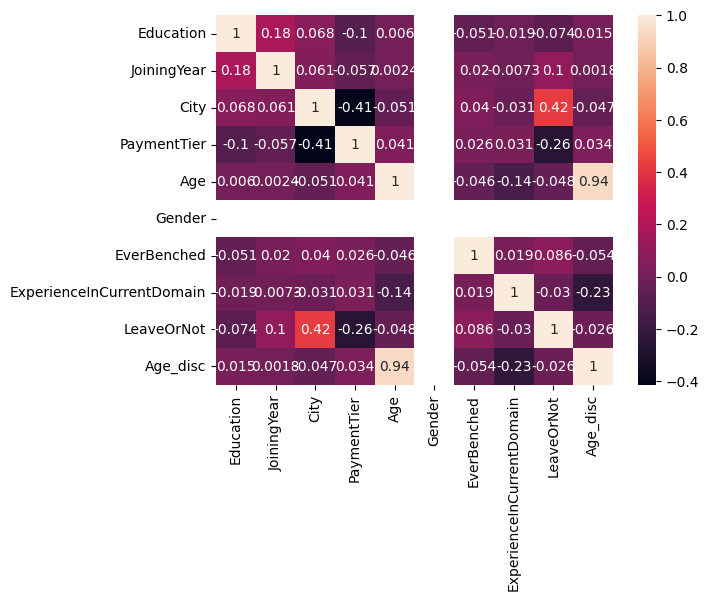

In [121]:
sns.heatmap(df[df['Gender'] == 0].corr(), annot=True)

In [122]:
top_correlated_feature = df[df['Gender'] == 0].corr()['LeaveOrNot'].sort_values(ascending=False)[1:2].index.tolist()
top_correlated_feature

#come si può osservare sia dalla heatmap che dal risultato appena ottenuto, la feature più correlata alla scelta se abbandonare o no è la città

['City']

<Axes: xlabel='City'>

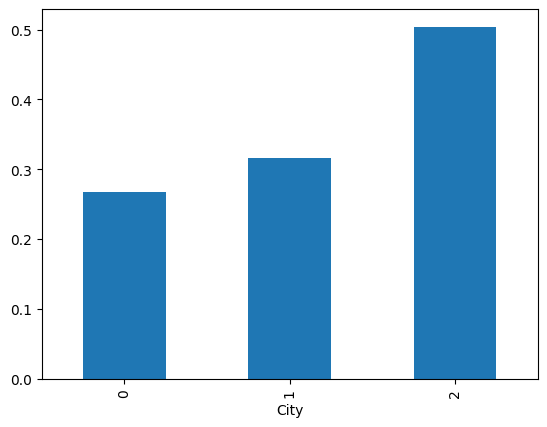

In [123]:
df.groupby('City')['LeaveOrNot'].mean().plot(kind='bar')

#si può osservare che per la città numero 2 ovvero "Pune" si ha maggiore probabilità che un dipendente lasci l'azienda

-------------------------------------------
PARTE 2
-------------------------------------------

In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

1. Si vuole predire l’abbandono degli impiegati. Ricaricare il dataset originale, eliminare
eventuali attributi inutili (giustificare la scelta), eliminare eventuali istanze che
contengono valori nulli, trasformare opportunamente valori categorici e dividere il
dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e
1/4 nel dataset “test”, preservando le proporzioni delle classi nella colonna target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai
classificatori DecisionTree, KNeighborsClassifier e da un dummy classifier a scelta.
Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione i valori
di accuracy, F1 e della confusion matrix. (punti 4)

In [125]:
df = pd.read_csv('dataset.csv', sep =',')
#non ci sono attributi inutili da eliminare in questo caso
df.dropna(inplace=True) #elimino le istanze che contengono i valori nulli -> non ce ne sono in realtà

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [126]:
models = {'DecisionTree': DecisionTreeClassifier(),
          'KNC': KNeighborsClassifier(),
          'Dummy': DummyClassifier(strategy="most_frequent")
          }

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"f1 on train {f1_score(trainlabels,trainpred)}")
  print(f"f1 on test {f1_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

 ===== DecisionTree =====
accuracy on train 0.9303525365434222
accuracy on test 0.7963917525773195
f1 on train 0.8895956383462063
f1 on test 0.6835781041388518
confusion matrix on train 
 [[2267   22]
 [ 221  979]]
confusion matrix on test 
 [[671  93]
 [144 256]]
 ===== KNC =====
accuracy on train 0.8480940097449126
accuracy on test 0.7852233676975945
f1 on train 0.7466539196940727
f1 on test 0.6345029239766082
confusion matrix on train 
 [[2178  111]
 [ 419  781]]
confusion matrix on test 
 [[697  67]
 [183 217]]
 ===== Dummy =====
accuracy on train 0.6560619088564058
accuracy on test 0.6563573883161512
f1 on train 0.0
f1 on test 0.0
confusion matrix on train 
 [[2289    0]
 [1200    0]]
confusion matrix on test 
 [[764   0]
 [400   0]]


osservando i risultati ottenuti possiamo osservare che il decision tree ha un ottima accuracy sul training set e una buona accuracy nel test set, seppure più basssa. questo comportamento si può osservare anche nel f1 score e nella confusion matrix

per quanto riguard il KNC si oserva un comportamento simile a quello del decizion tree però in questo caso performa peffio. sia sul training che nel test l'accuracy si abbassa e di coseguenza idem l'f1 score e la confusion matrix

per quanto riguarda il dummy classifier, la strategia che adotta è il most frequent, tende ad assegnare tutti i sample alla classe più probabile, in questo caso corrisponde allo 0, l'accuracy che si ottiene non è pessima siccome appunto la classe dello 0 è la più probabile però si può notare tramite l'f1 score e le confison matrix che non è un classificatore che performa come desiderato

2. Confrontare i valori di F1 ottenuti nel punto precedente con quelli che si ottengono
con una 10 Fold cross validation. (punti 1)

In [127]:
# cross_val_score ritorna array di score su ciascun fold
f1_scores_dt = cross_val_score( DecisionTreeClassifier() ,X, y, cv=10, scoring='f1')
print("decision tree  f1 10-fold:", f1_scores_dt)
print("decision tree  mean f1 10-fold:", np.mean(f1_scores_dt))

f1_scores_kn = cross_val_score(KNeighborsClassifier(),X, y, cv=10, scoring='f1')
print("KNC f1 10-fold:", f1_scores_kn)
print("KNC f1 mean 10-fold", np.mean(f1_scores_kn))

f1_score_dc = cross_val_score(DummyClassifier(), X, y, cv=10, scoring='f1')
print("dummy classifier f1 10-fold:", f1_score_dc)
print("dummy classifier mean f1 10-fold", np.mean(f1_score_dc))

#performando la 10 fold cross validation possiamo osservare delle performance che migliorano per quanto riguarda il decision tree e il KNC
#ma solo di qualche punto percentuale, rimangono dunque coerenti con i risultati precedenti. per quanto riguarda il dummy classidier invece
#l'f1 rimane a 0 come ci aspettiamo

decision tree  f1 10-fold: [0.72909699 0.69230769 0.76223776 0.6875     0.67507886 0.75254237
 0.71895425 0.68831169 0.67673716 0.68874172]
decision tree  mean f1 10-fold: 0.7071508500399529
KNC f1 10-fold: [0.66438356 0.69204152 0.76450512 0.65084746 0.65771812 0.68864469
 0.63380282 0.53278689 0.59479554 0.60516605]
KNC f1 mean 10-fold 0.648469176350757
dummy classifier f1 10-fold: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dummy classifier mean f1 10-fold 0.0


3. Attraverso la tecnica Leave-One-Covariate-Out (LOCO) e considerando il classificatore
KNeighborsClassifier, analizzare la feature importance del dataset utilizzato al punto 1.
Quali risultano essere le 2 feature più importanti? Queste sono anche le 2 feature più
correlate alla colonna target? (punti 4)

In [128]:
df = pd.read_csv('dataset.csv', sep =',')
#non ci sono attributi inutili da eliminare in questo caso
df.dropna(inplace=True) #elimino le istanze che contengono i valori nulli -> non ce ne sono in realtà

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [129]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
f1_fulldataset = f1_score(y_test, model.predict(X_test))

feature_names = X_test.columns
f1_features = {}
#Il dizionario f1_features conterrà i valori di F1-score del modello quando una specifica feature (caratteristica) viene rimossa dal training e dal testing.

for feature in feature_names:
    model.fit(X_train.drop(feature, axis=1), y_train) #il modello in questo caso va riallenato ogni volta sul nuovo dataset senza una feature
    f1_features[feature] = f1_score(y_test, model.predict(X_test.drop(feature, axis=1)))

f1_features

{'Education': 0.5988372093023255,
 'JoiningYear': 0.5863874345549738,
 'City': 0.5672082717872969,
 'PaymentTier': 0.6323319027181689,
 'Age': 0.6616989567809239,
 'Gender': 0.5668604651162791,
 'EverBenched': 0.6571018651362984,
 'ExperienceInCurrentDomain': 0.6528189910979229}

In [130]:
#osservando i risultati ci accorgiamo che le 2 feature più importanti risultano essere la città e il gender.
#andiamo a verificare se si tratta delle 2 feature più correlate alla colonna targer

In [131]:
top_correlated_feature = df.corr()['LeaveOrNot'].sort_values(ascending=False)[1:3].index.tolist()
top_correlated_feature #city è la feature più correlata alla colonna target, mentre gender non rientra nella top 2

['City', 'JoiningYear']

4. A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri
weights e n
_
neighbors del classificatore KNeighborsClassifier. Come varia il valore di
F1? (punti 2)

In [132]:
df = pd.read_csv('dataset.csv', sep =',')
#non ci sono attributi inutili da eliminare in questo caso
df.dropna(inplace=True) #elimino le istanze che contengono i valori nulli -> non ce ne sono in realtà

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [133]:
parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors':[2,5,7,10,20]
}

gd_dt = GridSearchCV(KNeighborsClassifier(),
                     parameters,
                     scoring='f1',
                     cv=5)

gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 7, 10, 20],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [134]:
best_par = gd_dt.best_params_
best_par

{'n_neighbors': 5, 'weights': 'distance'}

In [135]:
best_score = gd_dt.best_score_
best_score

np.float64(0.63521015427434)

In [136]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"f1 on train {f1_score(y_train, y_train_pred_best)}")
print(f"f1 on test {f1_score(y_test, y_test_pred_best)}")

#i risultati del f1 migliorano. in particolare sul training set si può osservare un miglioramento sostanziale passando da 0.74 a 0.88
#mentra sul test set il risultato rimane confrontabile con il precedente

f1 on train 0.8895956383462063
f1 on test 0.6384839650145773


5. Creare una pipeline in cui, a partire dal dataset utilizzato al punto precedente,
vengono applicate due trasformazioni a scelta a due diversi gruppi di colonne e gli altri
attributi sono lasciati invariati. Applicare il KNeighborsClassifier con i valori migliori dei
parametri analizzati nel punto precedente e confrontare i risultati. (punti 3)

In [137]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [138]:
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 5), ["Age","JoiningYear"]),
        ('std', StandardScaler(),["PaymentTier","ExperienceInCurrentDomain"]),
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('col_tran', col_tran),
                              ('estimator', KNeighborsClassifier(n_neighbors = 5, weights = 'distance'))
                             ])

pipeline

Pipeline(steps=[('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr', KBinsDiscretizer(),
                                                  ['Age', 'JoiningYear']),
                                                 ('std', StandardScaler(),
                                                  ['PaymentTier',
                                                   'ExperienceInCurrentDomain'])])),
                ('estimator', KNeighborsClassifier(weights='distance'))])

In [139]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_f1__test_pl = f1_score(y_test, y_pred_pl)
print(f"f1 on test {y_f1__test_pl}")

#applicando le 2 trasformazioni il valore del f1 score cala

f1 on test 0.5955678670360111


6. Aggiungere alla pipeline del punto 5 la funzione SelectKBest. Utilizzare la funzione di
gridSearchCV per selezionare il K migliore e anche i valori migliori dei parametri
weights e n
_
neighbors del classificatore KNeighborsClassifier (scegliere a piacere
alcuni valori). (punti 3)

In [140]:
pipeline_kbest = Pipeline(steps=[
    ('coltran', col_tran),
    ('kbest', SelectKBest()),
    ('estimator', KNeighborsClassifier(n_neighbors = 5, weights = 'distance'))
])

pipeline_kbest

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr', KBinsDiscretizer(),
                                                  ['Age', 'JoiningYear']),
                                                 ('std', StandardScaler(),
                                                  ['PaymentTier',
                                                   'ExperienceInCurrentDomain'])])),
                ('kbest', SelectKBest()),
                ('estimator', KNeighborsClassifier(weights='distance'))])

In [141]:
parameters = {
    'kbest__k' : [3,5,7,"all"],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__n_neighbors':[2,5,7,10,20]
}
gd = GridSearchCV(pipeline_kbest, parameters, scoring="f1", cv=5)
gd.fit(X_train,y_train)
y_pred = gd.predict(X_test)
print(f"bestparam {gd.best_params_}")
print(f"bestscore {gd.best_score_}")
print("test f1:", f1_score(y_test, y_pred)) #il valore rimane confrontabile con quelli precedenti

bestparam {'estimator__n_neighbors': 20, 'estimator__weights': 'distance', 'kbest__k': 7}
bestscore 0.6417706217176906
test f1: 0.6278755074424899


7. Creare una nuova pipeline che applica la decomposizione TruncatedSVD al dataset
iniziale e aggiunge le componenti ottenute alle componenti della pipeline del punto 5.
Valutare il valore migliore per il numero di componenti di TruncatedSVD tra 2, 4 e 6.
(punti 3)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

parameters = {
    'combined_features__svd__n_components': [2, 4, 6]
}

combined_features = FeatureUnion([("svd", TruncatedSVD()), ("coltran", col_tran)])

my_pipeline = Pipeline(steps=[('combined_features', combined_features),
                             ('estimator', KNeighborsClassifier(n_neighbors = 5, weights = 'distance'))
                             ]) #verbose = True) #verbose serve solo a farti vedere cosa sta succedendo mentre la pipeline viene eseguita.

gd = GridSearchCV(my_pipeline, parameters)
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)
print("f1: " + str(f1_score(y_test, y_pred)))
gd.best_params_

f1: 0.6395511921458625


{'combined_features__svd__n_components': 2}